# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Ghiffari Kenang Sagraha
- **Email:** ghiffarisagraha@apps.ipb.ac.id
- **ID Dicoding:** ghiffariks

## _About the Datasets_
_**case study**: Brazilian E-Commerce Public Dataset by Olist_\
_**descriptions**:_
_This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.This is **real commercial data**, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses._

_**notes:**_
* _An order might have multiple items._
* _Each item might be fulfilled by a distinct seller._
* _All text identifying stores and partners where replaced by the names of Game of Thrones great houses._

## Criteria

* Memberikan dokumentasi menggunakan markdown/text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan analisis data. 
* Membuat visualisasi data yang baik dan efektif dengan menerapkan prinsip desain dan integritas.
Deploy dashboard ke dalam streamlit cloud.
* Menerapkan teknik analisis lanjutan seperti RFM analysis, geospatial analysis, clustering, dll. (Tanpa menggunakan algoritma machine learning).
Catatan: Pastikan teknik analisis lanjutan yang dilakukan relevan dengan dataset yang digunakan.
* RFM Analysis, bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
    * Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
    * Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
    * Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.
Anda dapat melihat contoh implementasi kodenya pada submodul Latihan Membuat Visualisasi Data.
* Geospatial Analysis, bertujuan menganalisis data berdasarkan lokasi geografis untuk mengidentifikasi tren atau pola tertentu di suatu wilayah. Anda bisa menggunakan package seperti GeoPandas atau folium untuk membuat peta yang menampilkan distribusi data berdasarkan lokasi.
* Clustering, bertujuan mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu tanpa menggunakan algoritma machine learning. Berikut adalah beberapa metode clustering yang bisa diterapkan:
  * Manual Grouping: Menentukan kriteria pengelompokan berdasarkan aturan bisnis atau pemahaman domain, seperti mengelompokkan pelanggan berdasarkan rentang usia, pendapatan, atau jumlah transaksi.
  * Binning: Menggunakan teknik binning untuk membagi data ke dalam interval atau kategori tertentu.

## Menentukan Pertanyaan Bisnis (as Background) <a class="anchor" id="bussiness-questions"></a>

Berdasarkan insights yang didapatkan, maka dibentuklah bussiness question (rumusan masalah) sebagai berikut:
1. **Bagaimana performa penjualan dalam beberapa tahun terakhir**
2. **Bagaimana performa penjualan berdasarkan kategori produk?**
3. **Bagaimana pola geografis dari pelanggan dan penjual?**
4. **Bagaimana pola segmentasi pelanggan berdasarkan perilaku pembelian?** 

Analisis Lanjutan 
* **dengan RFM analysis, Kapan terakhir pelanggan melakukan transaksi? Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?**

## Import Semua Packages/Library yang Digunakan<a class="anchor" id="first-bullet"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import geopandas as gpd

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling <a class="anchor" id="data-wrangling"></a>

### Gathering Data <a class="anchor" id="datasets-loading"></a>

In [4]:
# Reading all the dataset
geoloc_df = pd.read_csv("./E-Commerce Public Dataset/geolocation_dataset.csv")
cust_df = pd.read_csv("./E-Commerce Public Dataset/customers_dataset.csv")
orders_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv")
orders_items_df = pd.read_csv("./E-Commerce Public Dataset/order_items_dataset.csv")
orders_payment_df = pd.read_csv("./E-Commerce Public Dataset/order_payments_dataset.csv")
products_df = pd.read_csv("./E-Commerce Public Dataset/products_dataset.csv")
sellers_df = pd.read_csv("./E-Commerce Public Dataset/sellers_dataset.csv")
order_reviews = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv")

In [5]:
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
orders_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Insights

Setelah membaca header dari masing-masing dataset, didapatkan beberapa insights dan beberapa hal yang dapat menjadi rumusan masalah atau 2 buah pertanyaan bisnis. Insights yang didapatkan adalah sebagai berikut:
* geoloc_df dapat dimanfaatkan untuk membuat visualisasi data sebaran order customer atau seller (berdasarkan database schema di bawah) dengan visualisasi berbentuk chloropleth (dapat digunakan untuk sellers_df ataupun cust_df)
* orders_df dapat memberikan insights tentang durasi pemrosesan pembelian, bisa tentang durasi pengiriman sejak pembelian, atau lainnya
* orders_items_df dapat memberikan insights seperti statistik pembelian oleh customers
* orders_payment_df dapat memberikan insights tentang jenis pembayaran dan value pembayaran
* products_df dapat memberikan insights untuk detail dari produk yang ada
* order_reviews dapat memberikan insights dari rating produk hasil pembelian

Berikut gambar database schema yang diambil dari sumber


<p align="center">
    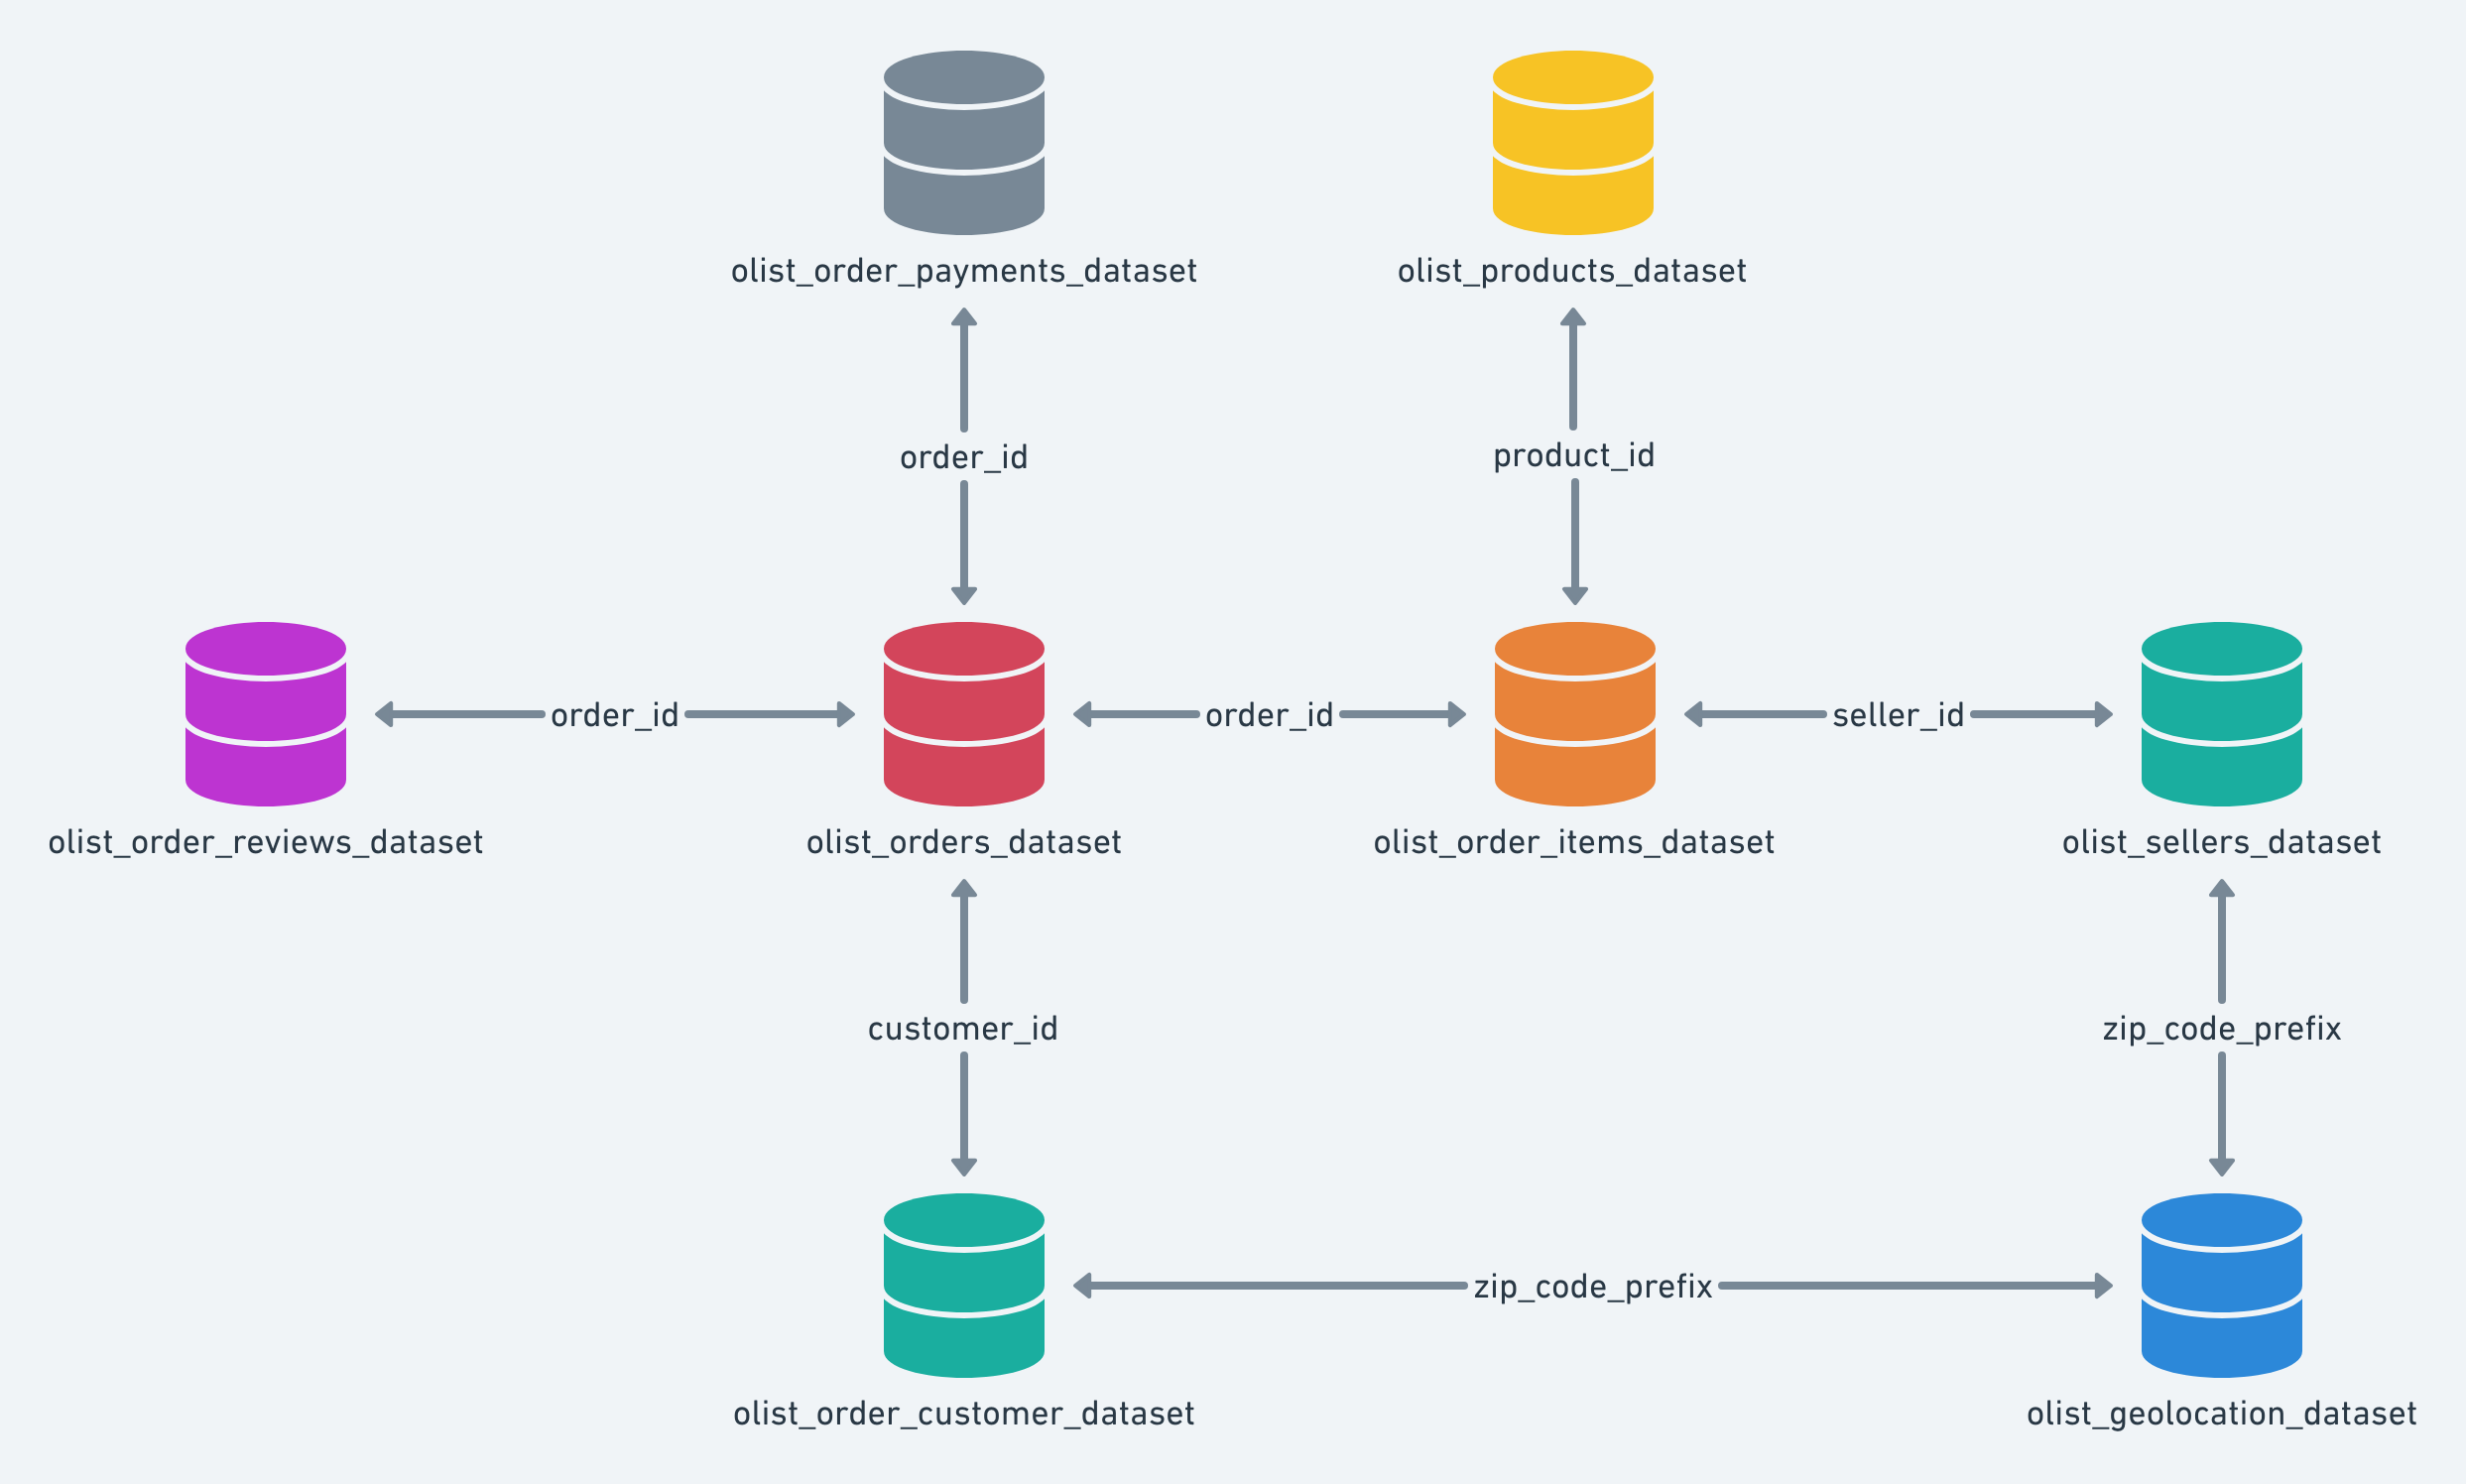
</p>

untuk menjawab poin 1, dapat dilakukan dengan pendekatan:
* Menggunakan `products_df`, `orders_items_df`, dan `orders_df`
* Bisa dilakukan analisis jumlah transaksi pada rentang waktu bulan
* Analisis ini dapat membantu memahami momen tren penjualan tertinggi pada e-commerce

untuk menjawab poin 2, dapat dilakukan dengan pendekatan:
* Menggunakan `products_df`, `orders_items_df`, dan `orders_df`, kita bisa melihat produk atau kategori mana yang paling laris.
* Bisa dilakukan analisis jumlah transaksi per kategori, rata-rata harga produk yang dibeli, serta jumlah rata-rata produk per pesanan.
* Analisis ini dapat membantu dalam strategi pemasaran dan stok produk.

untuk menjawab poin 3, dapat dilakukan pendekatan dengan 
  * menggunakan `geoloc_df`, `cust_df`, dan `sellers_df` untuk memahami sebaran geografis pelanggan dan penjual.
  * Visualisasi chloropleth dapat digunakan untuk melihat area dengan jumlah transaksi tertinggi, serta hubungan antara lokasi penjual dan pelanggan.
  * selain itu, apakah terdapat keterkaitan antara lokasi pelanggan dengan durasi pengiriman (orders_df)?


untuk menjawab poin 4 dan RFM analysis, dapat dilakukan dengan pendekatan:
* Dengan menggunakan `cust_df`, `orders_df`, `orders_items_df`, dan `orders_payment_df`, dapat dilakukan clustering pelanggan berdasarkan jumlah pesanan, frekuensi pembelian, total nilai transaksi, metode pembayaran, atau preferensi kategori produk.
* pada poin pertanyaan ini, dapat dilakukan **RFM Analysis**
* Segmentasi ini bisa membantu bisnis dalam personalisasi promosi dan strategi retensi pelanggan.

### Assessing Data

In [13]:
print(orders_df.info())
print(cust_df.info())
print(sellers_df.info())
print(products_df.info())
print(orders_payment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-

In [14]:
import pandas as pd

# Menyimpan data dalam bentuk list supaya lebih mudah diinspeksi
datas = [geoloc_df, cust_df, orders_df, orders_items_df, orders_payment_df, products_df, sellers_df]
dataset_names = ["geoloc_df", "cust_df", "orders_df", "orders_items_df", "orders_payment_df", "products_df", "sellers_df"]

def eval_missing_data():
    df_missing = pd.DataFrame()

    for name, data in zip(dataset_names, datas):
        missing_values = data.isnull().sum()
        missing_percentage = (missing_values / len(data)) * 100

        missing_data = pd.DataFrame({
            'Dataset': name,
            'Column': missing_values.index,
            'Missing Values': missing_values.values,
            'Percentage (%)': missing_percentage.values
        }).sort_values(by='Missing Values', ascending=False)

        df_missing = pd.concat([df_missing, missing_data], ignore_index=True)

    return df_missing.sort_values(by=['Missing Values', 'Dataset'], ascending=False)

df_missing_data = eval_missing_data()
df_missing_data

,Dataset,Column,Missing Values,Percentage (%)
10,orders_df,order_delivered_customer_date,2965,2.981668
11,orders_df,order_delivered_carrier_date,1783,1.793023
30,products_df,product_category_name,610,1.851234
31,products_df,product_description_lenght,610,1.851234
32,products_df,product_name_lenght,610,1.851234
33,products_df,product_photos_qty,610,1.851234
12,orders_df,order_approved_at,160,0.160899
34,products_df,product_weight_g,2,0.006070
35,products_df,product_height_cm,2,0.006070
36,products_df,product_length_cm,2,0.006070


In [15]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
orders_df[orders_df['order_status'] == 'unavailable']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [17]:
orders_df[orders_df['order_delivered_customer_date'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [18]:
orders_df[orders_df['order_delivered_customer_date'].isna()].groupby('order_status').agg({'order_id':'count'})

,order_id
order_status,
approved,2
canceled,619
created,5
delivered,8
invoiced,314
processing,301
shipped,1107
unavailable,609


Dari hasil evaluasi missing data, didapat insights bahwa:
* terdapat 1 daset dengan persentase **missing data terbesar** yakni dataset `orders_df`
* terdapat 2 dataset yang memiliki persentase missing data **diantara 1% dan 2%** yakni `products_df` dan `orders_df`
* Dataset sisanya memiliki persentase missing data **kurang dari 1%**
* perhatikan 2 output diatas, didapat bahwa order status yang unavailable, memiliki missing value pada kolom order_delivered_carrier_date dan dataframe orders_df yang memiliki missing value pada kolom 'order_delivered_customer_df' adalah pesanan yang saat data diekstrak, belum dihasilkan estimasi pengiriman sampai pada customer

Dalam hal ini, tidak dilakukan **drop rows untuk missing values** hanya untuk melihat jumlah pesanan by status\
**tapi** dilakukan drop pada analisis selainnya untuk mendapatkan insights tentang bagaimana karakteristik pesanan yang sudah didelivered

### Cleaning Data

In [19]:
orders_df[orders_df['order_status']=='unavailable'].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

In [20]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
datas = [geoloc_df, cust_df, orders_df, orders_items_df, orders_payment_df, products_df, sellers_df]
no_drop = orders_df.copy() #dilakukan copy dulu untuk data yang ingin dianalisis status pesanannya

for i in range(len(datas)):
    datas[i] = datas[i].dropna()

df_missing_data = eval_missing_data()
df_missing_data

,Dataset,Column,Missing Values,Percentage (%)
39,sellers_df,seller_id,0,0.0
40,sellers_df,seller_zip_code_prefix,0,0.0
41,sellers_df,seller_city,0,0.0
42,sellers_df,seller_state,0,0.0
30,products_df,product_id,0,0.0
31,products_df,product_category_name,0,0.0
32,products_df,product_name_lenght,0,0.0
33,products_df,product_description_lenght,0,0.0
34,products_df,product_photos_qty,0,0.0
35,products_df,product_weight_g,0,0.0


In [22]:
datas = [geoloc_df, cust_df, orders_df, orders_items_df, orders_payment_df, products_df, sellers_df]
for i in range(len(datas)):
    print(datas[i].describe())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
                                order_id                       customer_id  \
count        

### Insights
* diputuskan untuk **didrop** sebagai bentuk analisis pada **orders yang sudah berjalan**, sehingga barang yang bersifat *unavailable* tidak akan membantu banyak dalam mendapatkan insights
* dari hasil describe pada output diatas, terlihat tidak ada anomali pada data bertipe numerik karena tidak ada nilai negatif ataupun nilai yang tidak wajar berdasarkan kolomnya

## Exploratory Data Analysis (EDA)

#### Ekplorasi pada Orders Dataset

In [23]:
#q_1_df = [products_df, orders_items_df, orders_df]
q_1_df = orders_items_df.merge(orders_df, on='order_id', how='outer', suffixes=('', 'orders'))\
        .merge(products_df, on='product_id', how='left', suffixes=('_orders','_products'))  

date_cols = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for col in date_cols:
    q_1_df[col] = pd.to_datetime(q_1_df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

q_1_df = q_1_df.dropna() # memastikan bahwa memang tidak ada missing values setelah merging

In [24]:
count_by_status = no_drop.groupby('order_status').agg({'order_id':'count'}).reset_index()
count_by_status

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [25]:
q_1_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,108643,108643.000000,108643,108643,108643,108643.000000,108643.000000,108643,108643,108643,...,108643,108643,108643,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000
unique,95129,NaN,31625,2914,90128,NaN,NaN,95129,2,NaN,...,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,...,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,520,1996,21,NaN,NaN,21,108636,NaN,...,NaN,NaN,10952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.198632,NaN,NaN,NaN,120.085372,19.982591,NaN,NaN,2018-01-02 21:15:17.881759744,...,2018-01-15 08:28:43.203317504,2018-01-26 16:38:54.368527872,NaN,48.807691,787.319781,2.210810,2095.564178,30.197629,16.588312,23.030467
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,2016-09-15 12:16:38,...,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,2017-09-15 23:18:58,...,2017-09-27 18:29:42,2017-10-06 00:00:00,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.290000,NaN,NaN,2018-01-22 11:52:53,...,2018-02-05 14:13:22,2018-02-19 00:00:00,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.160000,NaN,NaN,2018-05-06 17:59:04.500000,...,2018-05-16 16:05:52,2018-05-28 00:00:00,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,NaN,21.000000,NaN,NaN,NaN,6735.000000,409.680000,NaN,NaN,2018-08-29 15:00:37,...,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


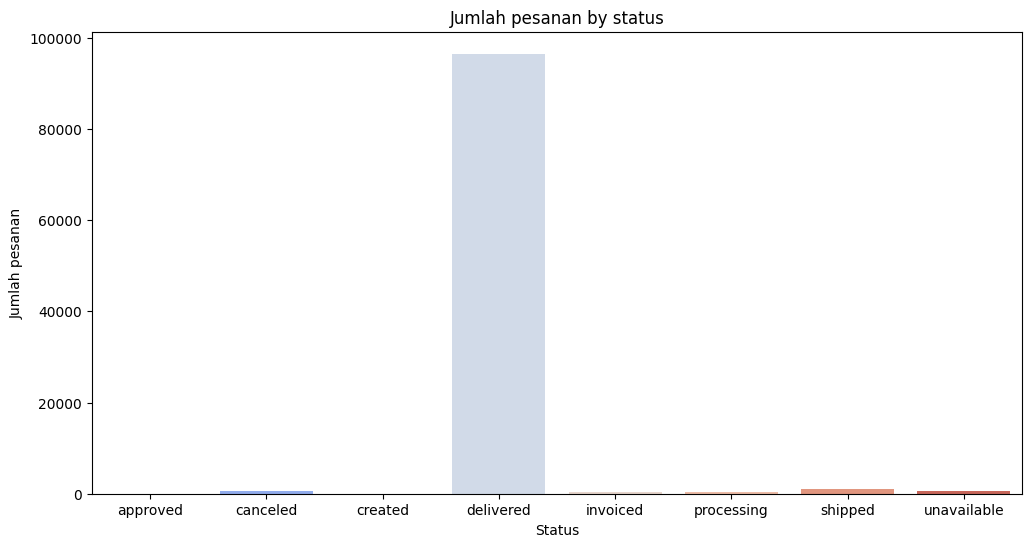

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_status['order_status'], y=count_by_status['order_id'], palette='coolwarm')
plt.xlabel("Status")
plt.ylabel("Jumlah pesanan")
plt.title("Jumlah pesanan by status")
plt.show()

#### Eksplorasi data pada dataset customer dan seller

In [27]:
print(cust_df.info())
print(sellers_df.info())
print(orders_payment_df.info())
print(geoloc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage:

In [28]:
# Merge geoloc_df ke cust_df dan sellers_df
cust_df = cust_df.merge(geoloc_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
sellers_df = sellers_df.merge(geoloc_df, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
cust_df = cust_df.dropna()
seller_df = sellers_df.dropna()

In [29]:
# pertama, load geojson file terlebih dahulu
geojson_path = "./E-Commerce Public Dataset/brazil-states.geojson"  # Update with your actual file path
brazil_states_gdf = gpd.read_file(geojson_path)

# aggregatkan cust_df
state_counts = cust_df.groupby("customer_state").size().reset_index(name="customer_count")

if "UF" in brazil_states_gdf.columns:
    brazil_states_gdf = brazil_states_gdf.rename(columns={"sigla": "customer_state"})

# Merge data cust_df dengan geojson
state_counts['customer_state'] = state_counts['customer_state'].str.upper()
merged_gdf = brazil_states_gdf.merge(state_counts, left_on='sigla', right_on="customer_state", how="left").fillna(0)

# Memastikan format
merged_gdf["customer_count"] = merged_gdf["customer_count"].astype(int)

print(merged_gdf[['customer_state', 'customer_count']].sort_values(by='customer_count', ascending=False).head(5))
print("\n\n Jumlah customer berdasar state")
print(cust_df.groupby('customer_city').agg({'customer_unique_id':'count'}).sort_values(by='customer_unique_id', ascending=False).iloc[:5])

   customer_state  customer_count
24             SP         5620450
17             RJ         3015709
9              MG         2878728
21             RS          805359
16             PR          626035


 Jumlah customer berdasar state
                customer_unique_id
customer_city                     
rio de janeiro             1913966
sao paulo                  1372374
belo horizonte              737548
niteroi                     452857
curitiba                    255744


In [30]:
# aggregatkan sellers_df
sellers_df = sellers_df.rename(columns={'seller_state':'customer_state'}) #diubah menjadi 'customer_state' supaya lebih mudah
state_counts = sellers_df.groupby("customer_state").size().reset_index(name="customer_count")

if "UF" in brazil_states_gdf.columns:
    brazil_states_gdf = brazil_states_gdf.rename(columns={"sigla": "customer_state"})

# Merge data cust_df dengan geojson
state_counts['customer_state'] = state_counts['customer_state'].str.upper()
merged_gdf = brazil_states_gdf.merge(state_counts, left_on='sigla', right_on="customer_state", how="left").fillna(0)

# Memastikan format
merged_gdf["customer_count"] = merged_gdf["customer_count"].astype(int)

print(merged_gdf[['customer_state', 'customer_count']].rename(columns={'customer_count':'seller_count'}).sort_values(by='seller_count', ascending=False).head(5))
print(sellers_df.groupby('seller_city').agg({'seller_id':'count'}).sort_values(by='seller_id', ascending=False).iloc[:5])
plt.show()

   customer_state  seller_count
24             SP        238457
9              MG         61331
16             PR         44466
17             RJ         35643
22             SC         24696
                seller_id
seller_city              
sao paulo           49623
rio de janeiro      23517
curitiba            20246
belo horizonte      16358
ibitinga            14014


#### Melihat bagaimana payment yang dilakukan pelanggan (dengan binning)

In [31]:
payment_analysis = orders_df.merge(orders_payment_df, on='order_id', how='left', suffixes=('left_','right_'))
payment_analysis = payment_analysis.dropna() #memastikan tidak ada yang hilang setelah di merge

In [32]:
payment_binning = payment_analysis[['order_id', 'customer_id','payment_type', 'payment_value']]
customer_payment = payment_binning.groupby("customer_id")["payment_value"].sum().reset_index()
customer_payment.rename(columns={"payment_value": "total_payment"}, inplace=True)
bins = [0, 50, 100, 200, 500, 1000, 5000, 14000]
labels = ["0-50", "50-100", "100-200", "200-500", "500-1000", "1000-5000", "5000+"]

customer_payment["payment_bin"] = pd.cut(customer_payment["total_payment"], bins=bins, labels=labels, right=False)
customer_payment.groupby('payment_bin').agg({'customer_id':'count'})

,customer_id
payment_bin,
0-50,16452
50-100,29460
100-200,31009
200-500,15463
500-1000,2969
1000-5000,1101
5000+,6


#### Melihat hasil review

In [33]:
# mempersiapkan data
review_analysis = payment_binning.merge(order_reviews, on='order_id', how='left')
review_analysis.dropna(subset=['review_score'])
review_analysis = review_analysis[['order_id', 'customer_id', 'payment_value', 'payment_value', 'review_score']]
score = review_analysis.groupby('review_score').agg({'order_id': 'count'})
score

,order_id
review_score,
1.0,9850
2.0,3092
3.0,8314
4.0,19844
5.0,59532


In [34]:
review_analysis

,order_id,customer_id,payment_value,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,18.12,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2.00,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,18.59,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,141.46,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,179.12,179.12,5.0
...,...,...,...,...,...
101303,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,85.08,85.08,5.0
101304,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,195.00,195.00,4.0
101305,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,271.01,271.01,5.0
101306,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,441.16,441.16,2.0


#### Eksplorasi penanganan pembelian

In [35]:
review_analysis_2 = review_analysis.merge(orders_df[['order_id', 'order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date']],
                                        on='order_id',
                                        how='left')
review_analysis_2 = review_analysis_2.dropna()

dates_col = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date']
for col in dates_col:
    review_analysis_2[col] = pd.to_datetime(review_analysis_2[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

review_analysis_2['diff_appr_delivCarr'] = review_analysis_2['order_delivered_carrier_date'] - review_analysis_2['order_approved_at'] 
review_analysis_2['diff_appr_estdeliv'] = review_analysis_2['order_estimated_delivery_date'] - review_analysis_2['order_approved_at']

review_analysis_2["diff_appr_delivCarr"] = review_analysis_2["diff_appr_delivCarr"].dt.total_seconds() / 86400
review_analysis_2["diff_appr_estdeliv"] = review_analysis_2["diff_appr_estdeliv"].dt.total_seconds() / 86400

review_analysis_2 = review_analysis_2[['order_id', 'customer_id', 'payment_value', 'review_score', 'diff_appr_delivCarr', 'diff_appr_estdeliv']]
review_analysis_2.describe()

,payment_value,payment_value,review_score,diff_appr_delivCarr,diff_appr_estdeliv
count,100632.000000,100632.000000,100632.000000,100632.000000,100632.000000
mean,152.646713,152.646713,4.153868,2.799593,23.347094
std,212.844468,212.844468,1.286225,3.526691,8.767049
min,0.000000,0.000000,1.000000,-171.219005,-6.664225
25%,56.780000,56.780000,4.000000,0.877778,18.007905
50%,99.900000,99.900000,5.000000,1.823953,22.725590
75%,171.000000,171.000000,5.000000,3.578472,28.089876
max,13664.080000,13664.080000,5.000000,125.762569,153.576030


### Insights EDA


Eksplorasi data pada dataset customer dan seller
* dari dataset orders, terdapat 8 status pembelian pelanggan, dimana yang tertinggi menunjukkan bahwa delivered yang tertinggi frekuensinya 

Eksplorasi data pada dataset geolocation*
* Seller dan Customer cukup terpusat pada Rio de Janeiro dan Sao Paulo 

**Eksplorasi data pada payment** 
* rata-rata pembelian berada di angka 152.64 BRL dengan pembelian terbesar yakni 13,664.08 BRL

**Eksplorasi data pada review** 
* Review pelanggan terbanyak pada 5 bintang sebanyak 59532, yang berarti kualitas barang sudah baik

## Explanatory Data Analysis (ExDA) & Visualisasi Data

Menyelesaikan Bussiness Question 1\
**Bagaimana performa penjualan berdasarkan kategori produk?**

C:\Users\Ghiffari\AppData\Local\Temp\ipykernel_756\2926190275.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(daily_orders_df["timestamp_pembelian"].dt.strftime('%d-%b'), rotation=45, fontsize=9)


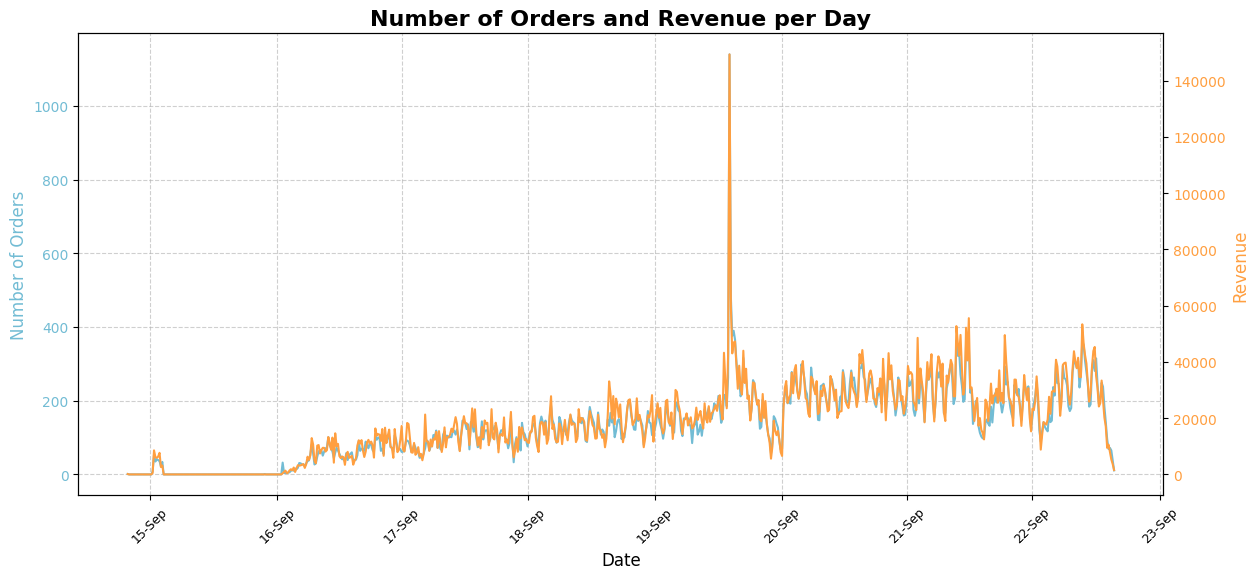

In [36]:
q_1_df["order_purchase_timestamp"] = pd.to_datetime(q_1_df["order_purchase_timestamp"])

daily_orders_df = q_1_df.resample(rule='D', on='order_purchase_timestamp').agg({
    "order_id": "nunique",  
    "price": "sum"          
}).reset_index()
daily_orders_df.columns = ['timestamp_pembelian', 'jumlah_order', 'revenue']

# Visualisasi Data
fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = "#72BCD4"
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Number of Orders", fontsize=12, color=color1)
sns.lineplot(data=daily_orders_df, x="timestamp_pembelian", y="jumlah_order", linewidth=1.5, color=color1, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(daily_orders_df["timestamp_pembelian"].dt.strftime('%d-%b'), rotation=45, fontsize=9)

ax2 = ax1.twinx()
color2 = "#FF9F40"
ax2.set_ylabel("Revenue", fontsize=12, color=color2)
sns.lineplot(data=daily_orders_df, x="timestamp_pembelian", y="revenue", linewidth=1.5, color=color2, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Number of Orders and Revenue per Day", fontsize=16, fontweight="bold")
ax1.grid(True, linestyle="--", alpha=0.6)

plt.show()

C:\Users\Ghiffari\AppData\Local\Temp\ipykernel_756\1915198300.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_orders_df["timestamp_pembelian"], rotation=45, fontsize=10)


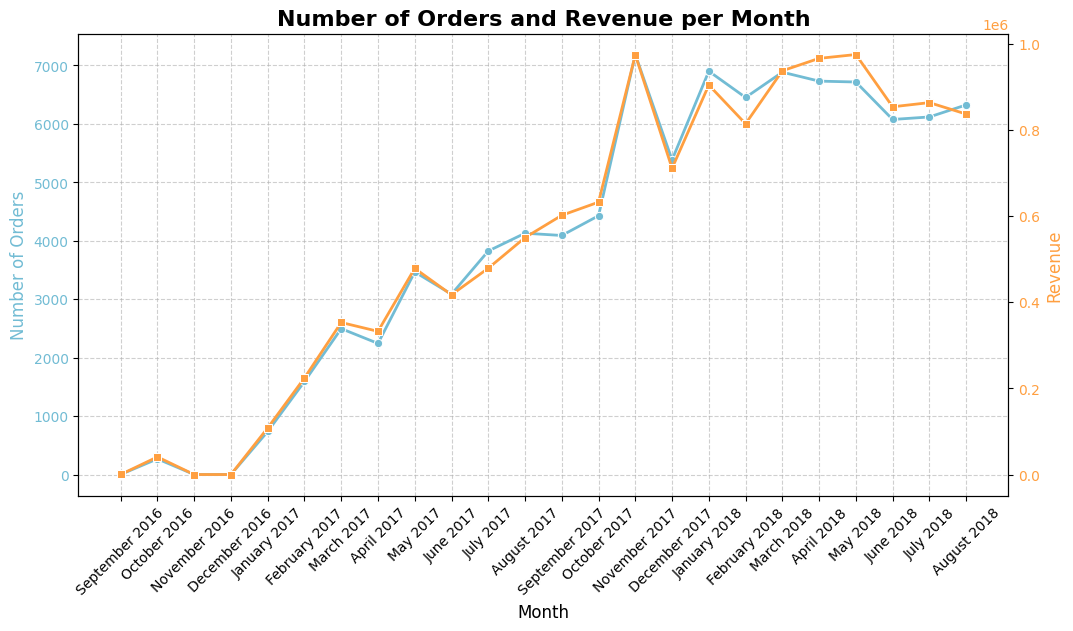

In [37]:
# Pastikan order_date dalam format datetime
q_1_df["order_purchase_timestamp"] = pd.to_datetime(q_1_df["order_purchase_timestamp"])

# Agregasi jumlabh pesanan dan pendapatan per bulan
monthly_orders_df = q_1_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",  # Jumlah pesanan unik
    "price": "sum"          # Total pendapatan
})

# Format index menjadi nama bulan
monthly_orders_df.index = monthly_orders_df.index.strftime('%B %Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.columns = ['timestamp_pembelian','jumlah_order','revenue']

# Visualisasi Data
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = "#72BCD4"
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Number of Orders", fontsize=12, color=color1)
sns.lineplot(data=monthly_orders_df, x="timestamp_pembelian", y="jumlah_order", marker='o', linewidth=2, color=color1, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(monthly_orders_df["timestamp_pembelian"], rotation=45, fontsize=10)

ax2 = ax1.twinx()
color2 = "#FF9F40"
ax2.set_ylabel("Revenue", fontsize=12, color=color2)
sns.lineplot(data=monthly_orders_df, x="timestamp_pembelian", y="revenue", marker='s', linewidth=2, color=color2, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Number of Orders and Revenue per Month", fontsize=16, fontweight="bold")
ax1.grid(True, linestyle="--", alpha=0.6)

plt.show()

### Hasil Menyelesaikan Bussiness Question 1
**Bagaimana performa penjualan berdasarkan kategori produk?**

dari data-data yang telah dianalisis didapatkan insights bahwa: 
* E-commerce ini memiliki **jumlah order terendah pada september, november dan December 2016** 
* E-commerce ini memiliki **jumlah revenue (dari price) terbesar pada Bulan May 2018** sebesar 974447.65 Brazilian Real
* Terjadi peningkatan signifikan sejak **November 2016** yang mengindikasikan penjualan dan metode yang dilakukan untuk bisa menggait customer sudah tepat

### Menyelesaikan Bussiness Question 2
**Bagaimana performa penjualan berdasarkan kategori produk?**

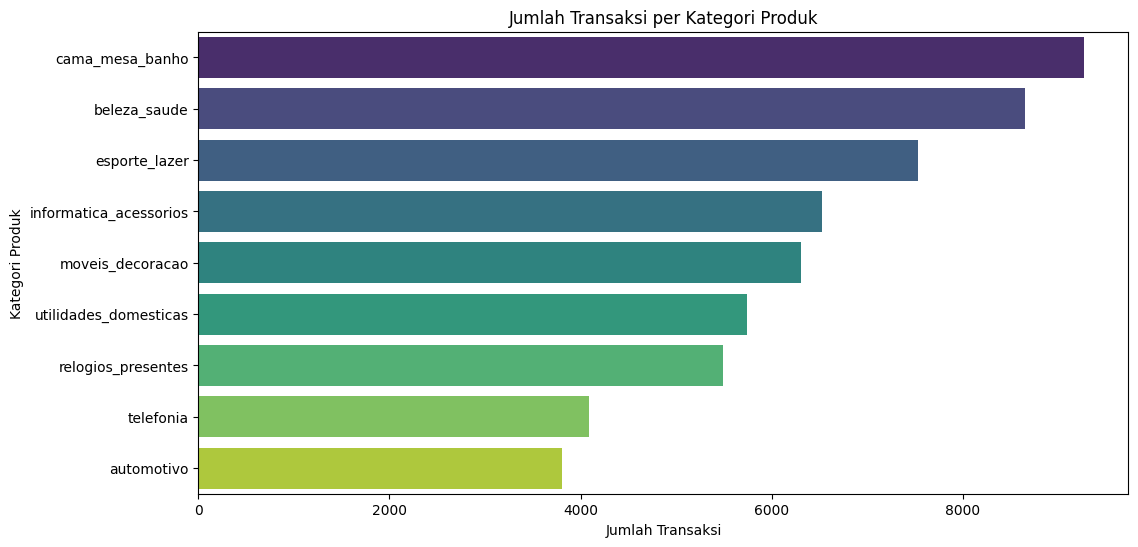

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah transaksi per kategori
category_counts = q_1_df.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False).iloc[:9]
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kategori Produk")
plt.title("Jumlah Transaksi per Kategori Produk")
plt.show()

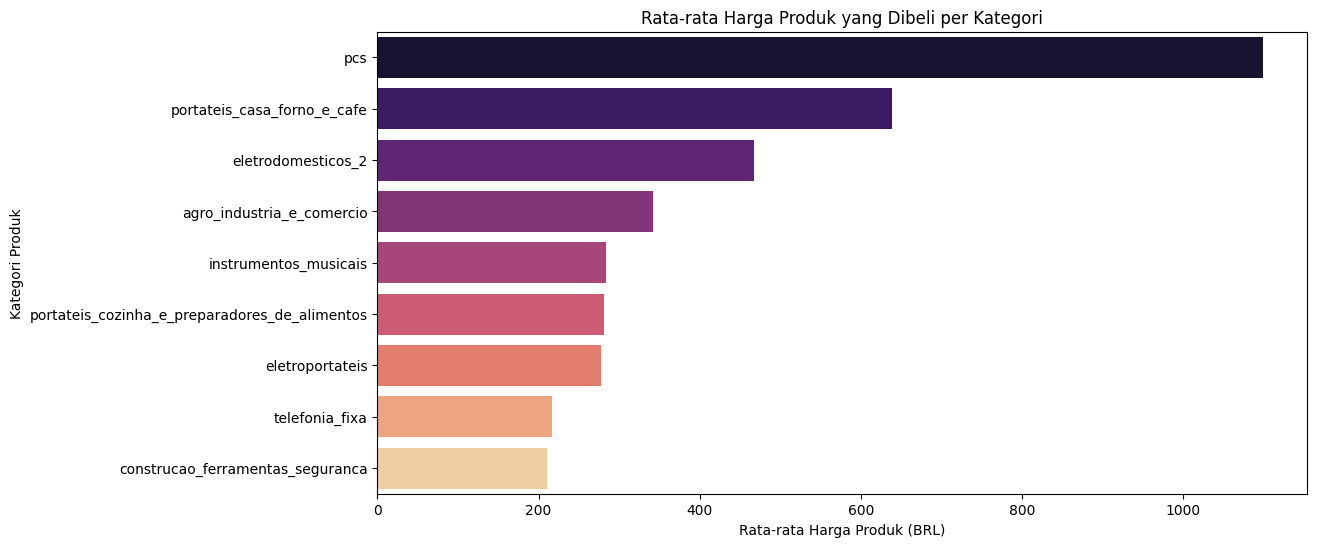

In [39]:
# Menghitung rata-rata harga produk per kategori
avg_price_per_category = q_1_df.groupby('product_category_name')['price'].mean().sort_values(ascending=False).iloc[:9]
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category.values, y=avg_price_per_category.index, palette='magma')
plt.xlabel("Rata-rata Harga Produk (BRL)")
plt.ylabel("Kategori Produk")
plt.title("Rata-rata Harga Produk yang Dibeli per Kategori")
plt.show()


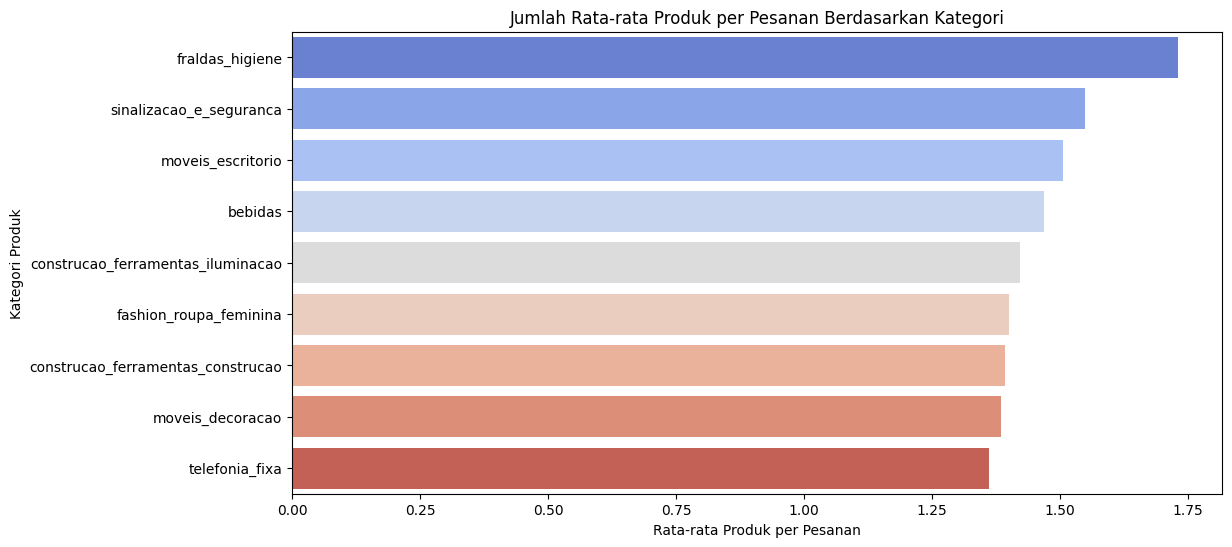

In [40]:
# Menghitung rata-rata jumlah produk per pesanan per kategori
avg_items_per_order = q_1_df.groupby('product_category_name')['order_item_id'].mean().sort_values(ascending=False).iloc[:9]
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_items_per_order.values, y=avg_items_per_order.index, palette='coolwarm')
plt.xlabel("Rata-rata Produk per Pesanan")
plt.ylabel("Kategori Produk")
plt.title("Jumlah Rata-rata Produk per Pesanan Berdasarkan Kategori")
plt.show()

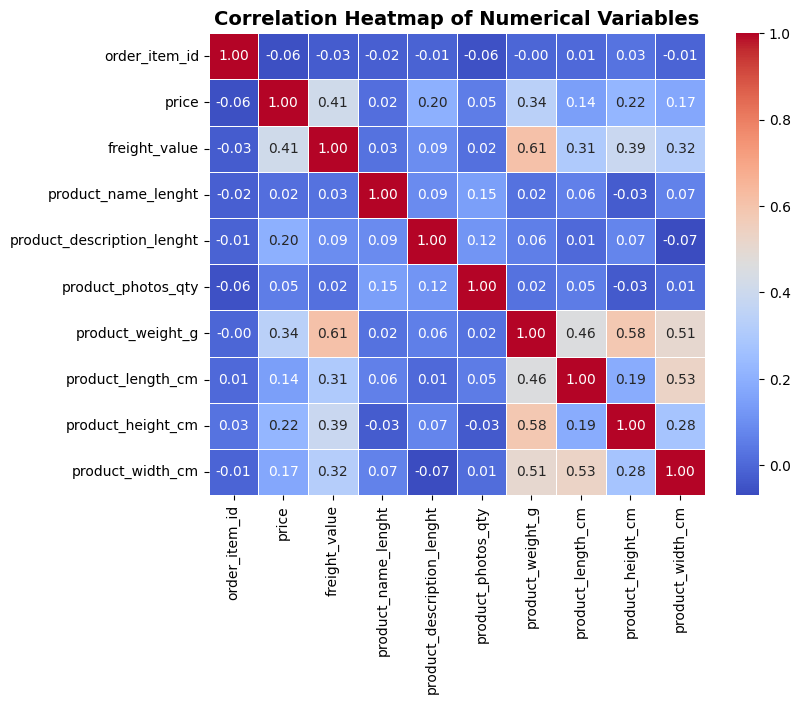

In [41]:
# Menghitung korelasi antar variabel numerik
corr_matrix = q_1_df.select_dtypes('float64').corr()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14, fontweight="bold")
plt.show()

### Hasil Menyelesaikan Bussiness Question 2
**Bagaimana performa penjualan berdasarkan kategori produk?**

* Top 3 kategori dengan rata-rata harga produk yang ingin dibeli yakni `kebersihan popok`, `persinyalan_dan_keselamatan`, `perabotan kantor`
* Top 3 Rata-rata Harga Produk yang Dibeli per Kategori terdiri atas `buah`, `peralatan_rumah_tangga` dan `portateis_casa_fomo_e_cafe`
* Top 3 Jumlah transaksi per kategori produk adalah `tempat_tidur_meja_kamar_mandi`, `kecantikan_kesehatan`, `Olahraga_santai`

### Menyelesaikan Bussiness Question 3
**Bagaimana pola geografis dari pelanggan dan penjual?**

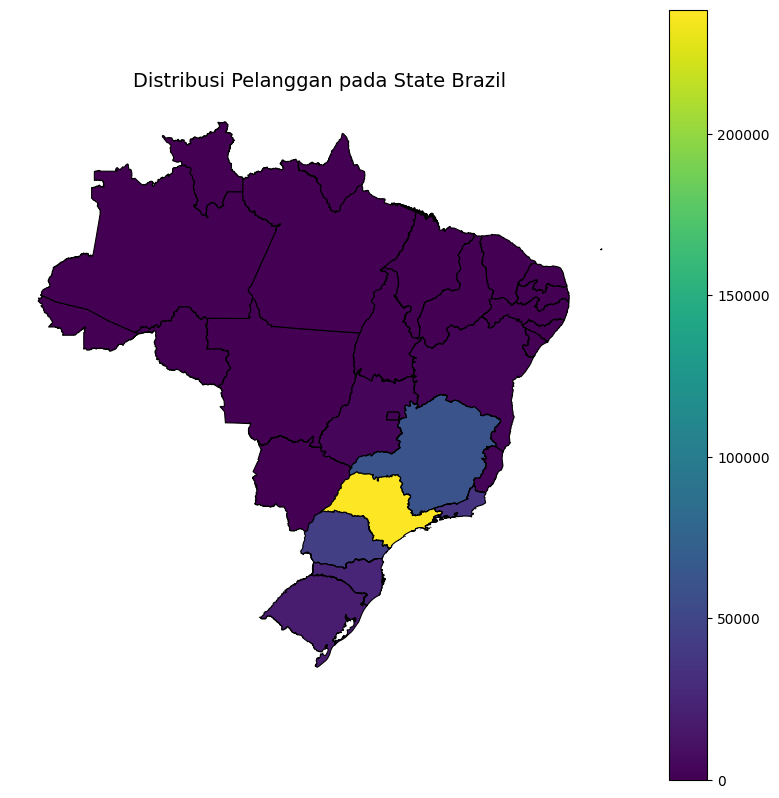

In [42]:
# Visualisasi Data
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column="customer_count", cmap="viridis", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Distribusi Pelanggan pada State Brazil", fontsize=14)
ax.axis("off")
plt.show()

(np.float64(-76.07020615),
 np.float64(-30.310906850000002),
 np.float64(-35.7024745),
 np.float64(7.222088500000001))

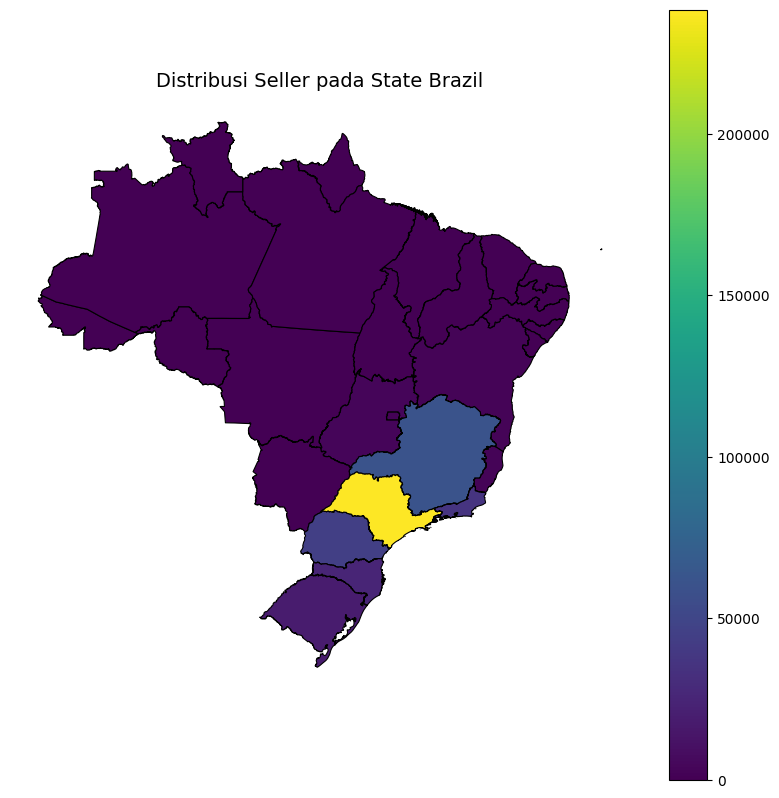

In [43]:
# Visualisasi Data
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column="customer_count", cmap="viridis", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Distribusi Seller pada State Brazil", fontsize=14)
ax.axis("off")


### Hasil Menyelesaikan Bussiness Question 3
**Bagaimana pola geografis dari pelanggan dan penjual?**

dari data-data yang telah dieksplorasi dengan digabung oleh analisis pada Exploratory Data, didapatkan insights bahwa: 
* Top 5 city dengan jumlah seller terbanyak adalah sao paulo, rio de janeiro, curitiba, belo horizonte, ibitinga 
* Top 5 state dengan jumlah seller terbanyak adalah  SP, MG, PR, RJ, SC
* Top 5 city dengan jumlah customer terbanyak adalah rio de janeiro, sao paulo, belo horizonte, niteroi, curitiba   
* Top 5 state dengan jumlah seller terbanyak adalah  SP, RJ, MG, RS, PR

### Menyelesaikan Bussiness Question 4
**Bagaimana pola segmentasi pelanggan berdasarkan perilaku pembelian?**

#### Segmentasi berdasarkan pembayaran (tipe dan jumlah)

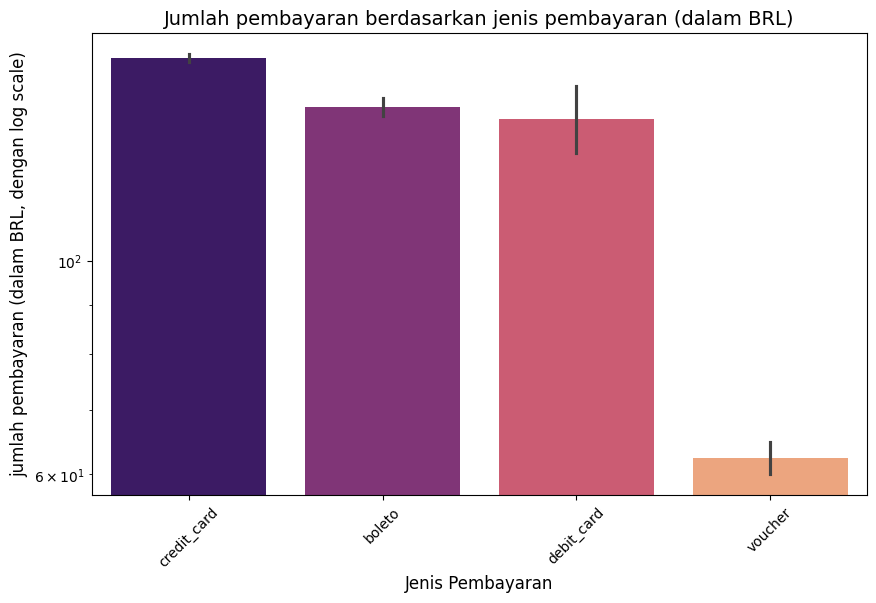

In [44]:
#Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_analysis.sort_values(by='payment_value', ascending=False)['payment_type'], y=payment_analysis.sort_values(by='payment_value', ascending=False)['payment_value'], palette='magma')
plt.yscale("log") 
plt.xlabel("Jenis Pembayaran", fontsize=12)
plt.ylabel("jumlah pembayaran (dalam BRL, dengan log scale)", fontsize=12)
plt.title("Jumlah pembayaran berdasarkan jenis pembayaran (dalam BRL)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### Visualisasi Binning

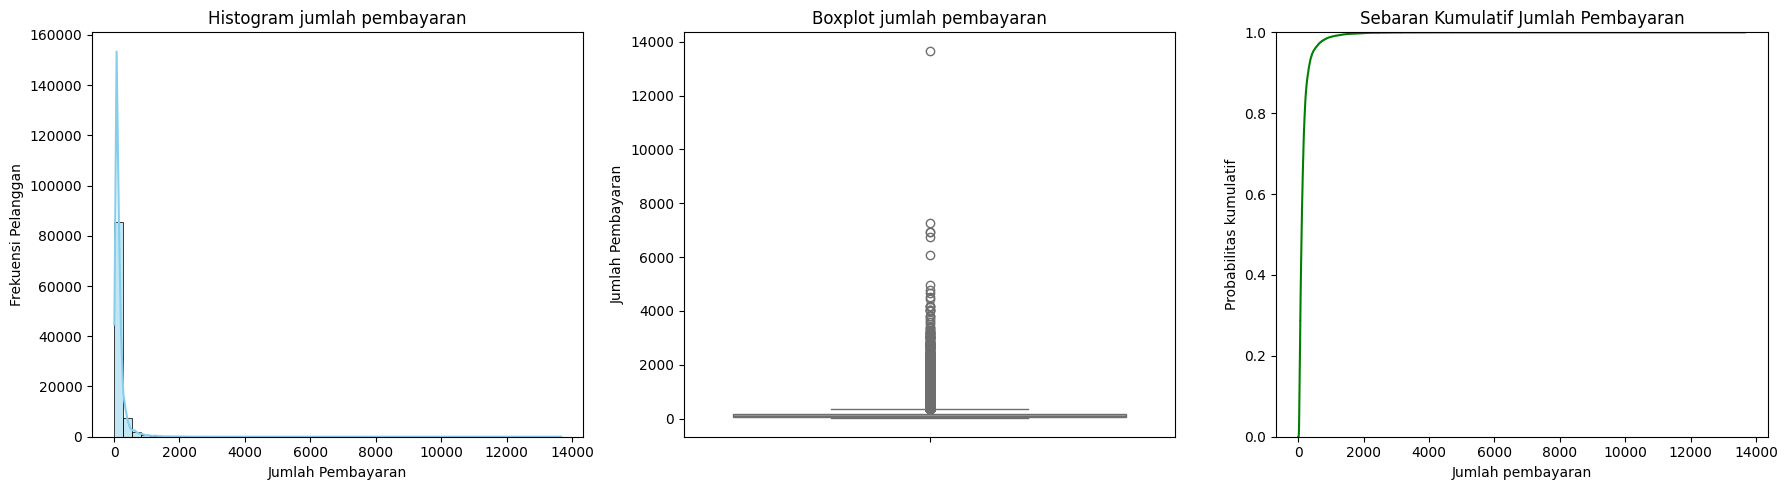

In [45]:
# Visualisasi Data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(customer_payment["total_payment"], bins=50, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram jumlah pembayaran")
axes[0].set_xlabel("Jumlah Pembayaran")
axes[0].set_ylabel("Frekuensi Pelanggan")

# Boxplot
sns.boxplot(y=customer_payment["total_payment"], ax=axes[1], color="lightcoral")
axes[1].set_title("Boxplot jumlah pembayaran")
axes[1].set_ylabel("Jumlah Pembayaran")

# ECDF (Empirical CDF)
sns.ecdfplot(customer_payment["total_payment"], ax=axes[2], color="green")
axes[2].set_title("Sebaran Kumulatif Jumlah Pembayaran")
axes[2].set_xlabel("Jumlah pembayaran")
axes[2].set_ylabel("Probabilitas kumulatif")

plt.tight_layout()
plt.show()

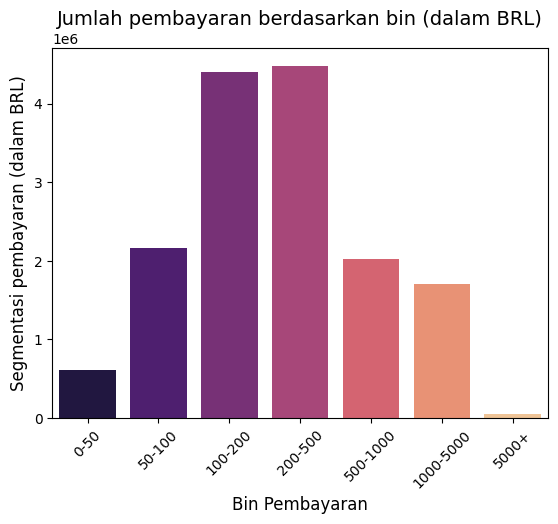

In [46]:
binned = customer_payment[['payment_bin','total_payment']].groupby("payment_bin").agg('sum').reset_index()
sns.barplot(x=binned['payment_bin'], y=binned['total_payment'],  palette='magma')
plt.xlabel("Bin Pembayaran", fontsize=12)
plt.ylabel("Segmentasi pembayaran (dalam BRL)", fontsize=12)
plt.title("Jumlah pembayaran berdasarkan bin (dalam BRL)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Segmentasi berdasarkan review

Text(0.5, 1.0, 'skor review')

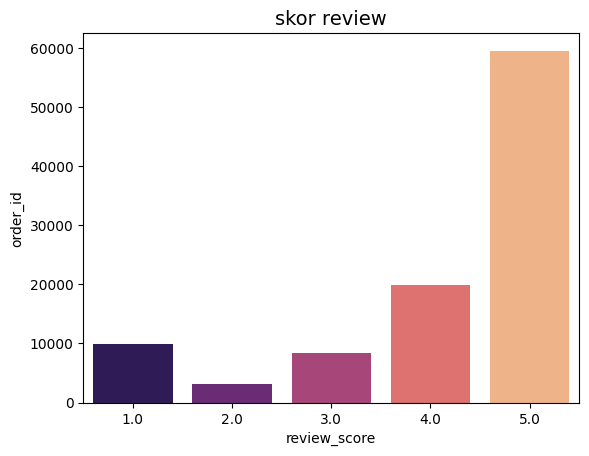

In [47]:
score = score.reset_index()
sns.barplot(x=score["review_score"], y=score["order_id"]  ,palette='magma')
plt.title("skor review", fontsize=14)

### Hasil Menyelesaikan Bussiness Question 4
**Bagaimana pola segmentasi pelanggan berdasarkan perilaku pembelian?**

dari data-data yang telah dianalisis didapatkan insights bahwa: 
* Pola segmentasi pelanggan berdasar jenis pembayaran yang terbanyak memberikan kontribusi dalam revenue adalah credit card. sementara yang paling sedikit adalah voucher
* Selain itu, jumlah pembayaran terbanyak yang memberikan kontribusi berdasarkan bin terdapat pada range pembayaran 200-500 BRL

## Analisis Lanjutan (RFM Analysis)

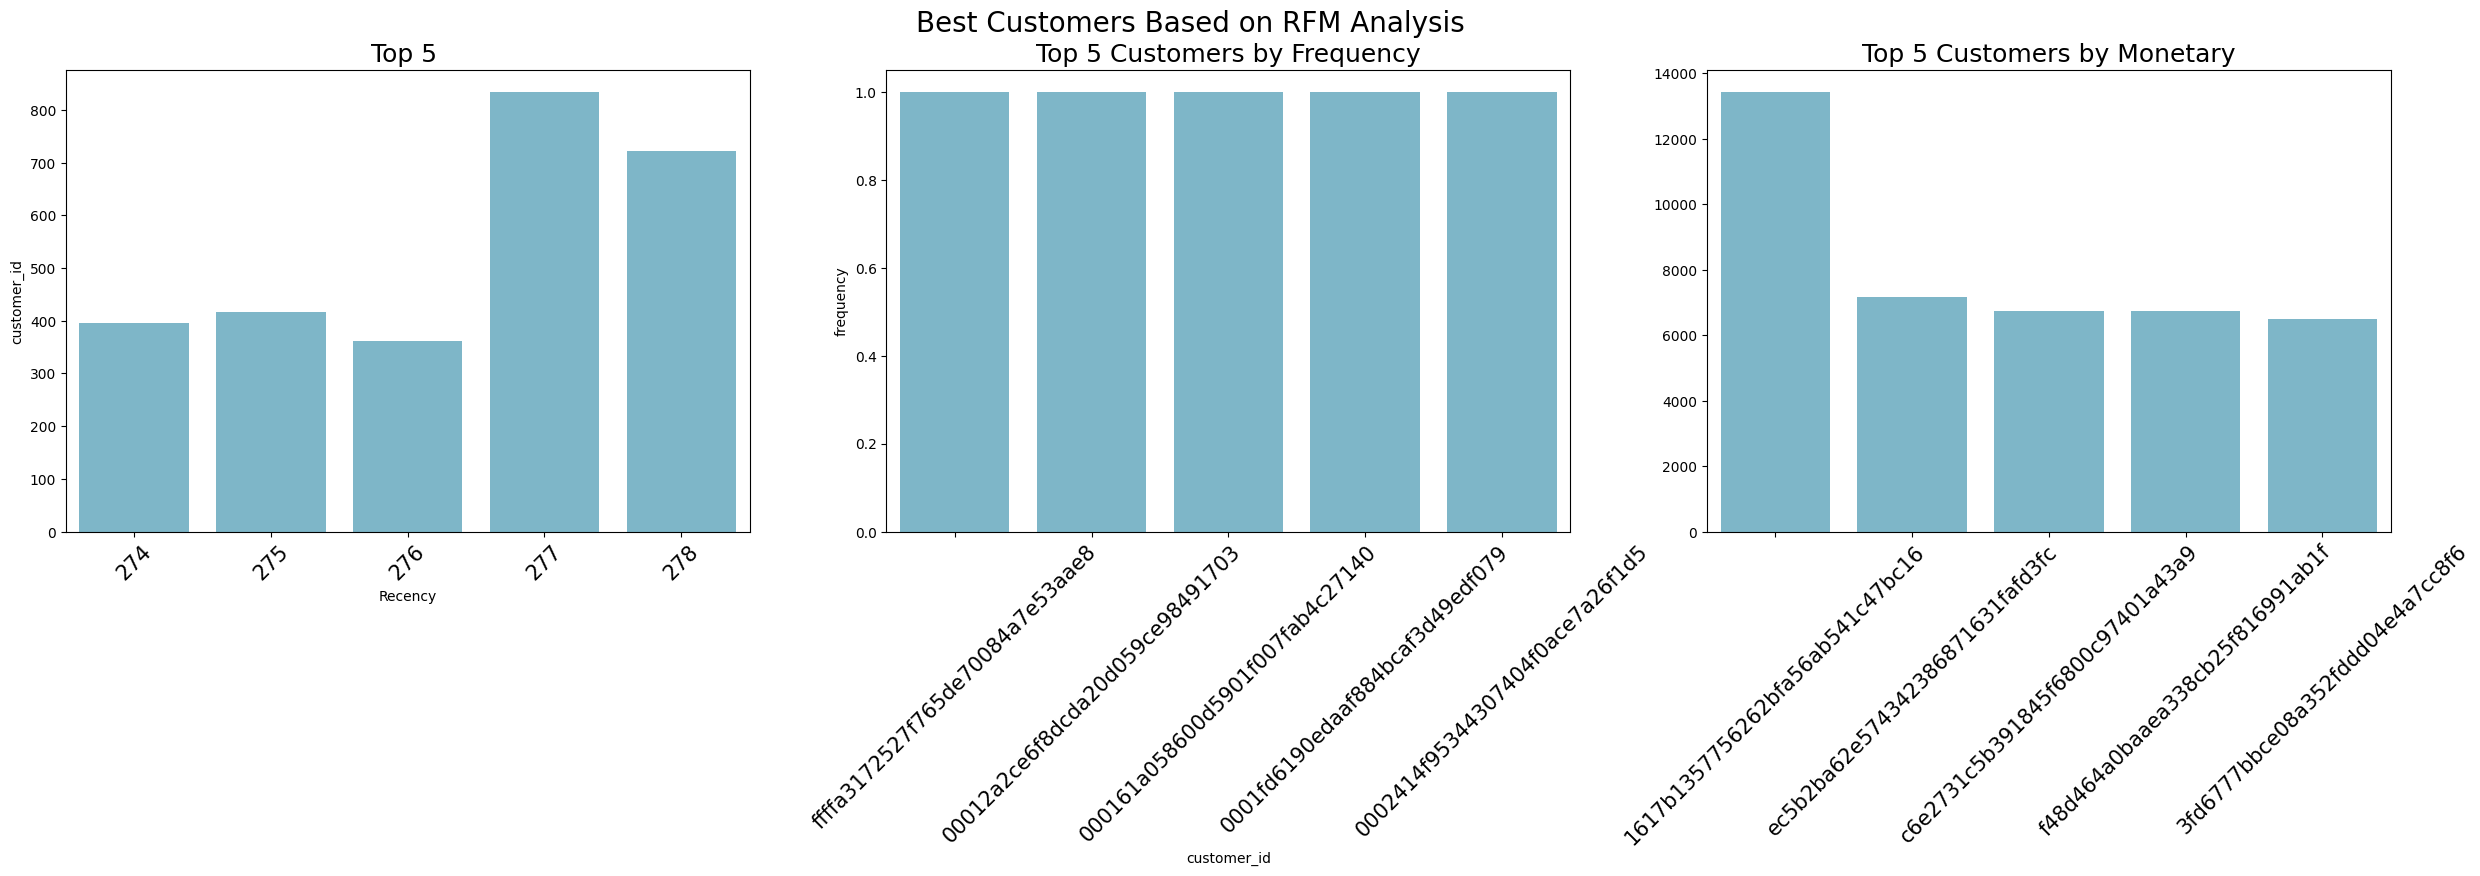

In [48]:
latest_date = q_1_df['order_purchase_timestamp'].max()

rfm_df = q_1_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency (jumlah pesanan unik)
    'price': 'sum'  # Monetary (total pengeluaran)
}).reset_index()

rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)

# Visualisasi RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualisasi Recency
recency = rfm_df.groupby('Recency').agg({'customer_id':'count'}).reset_index().sort_values(by='customer_id', ascending=False)
sns.barplot(y="customer_id", x="Recency", data=recency.iloc[:5], palette=colors, ax=ax[0])
ax[0].tick_params(axis='x', labelsize=15, rotation=45)
ax[0].set_title("Top 5 ", loc="center", fontsize=18)

# Visualisasi Frequency
sns.barplot(y="Frequency", x="customer_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('customer_id')
ax[1].set_title("Top 5 Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# Visualisasi Monetary 
sns.barplot(y="Monetary", x="customer_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Top 5 Customers by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Best Customers Based on RFM Analysis", fontsize=20)
plt.show()

#### **1. Recency (R) - Seberapa Baru Pelanggan Melakukan Transaksi**
- **Rata-rata:** 238 hari sejak transaksi terakhir  
- **Median:** 219 hari  
- **Distribusi:**
  - 25% pelanggan terakhir bertransaksi dalam 114 hari terakhir : menunjukkan bahwa pelanggan aktif  
  - 50% pelanggan terakhir bertransaksi dalam 219 hari terakhir  
  - 75% pelanggan terakhir bertransaksi dalam 348 hari terakhir : mayoritas pelanggan sudah cukup lama tidak bertransaksi  
  - Maksimum:** 713 hari : ada pelanggan yang sudah hampir 2 tahun tidak bertransaksi  
- **Insight:**  
  - Banyak pelanggan yang tidak melakukan transaksi baru dalam jangka waktu lama.  
  - Strategi **re-engagement campaign** dapat diterapkan untuk mengaktifkan kembali pelanggan lama, misalnya dengan email atau diskon khusus.  

#### **2. Frequency (F) - Seberapa Sering Pelanggan Bertransaksi**
- **Mean & Median:** 1 transaksi per pelanggan  
- **Distribusi:** Semua pelanggan hanya melakukan **1 kali transaksi** dalam dataset ini.  
- **Insight:**  
  - Tidak ada pelanggan yang melakukan transaksi berulang.  
  - Ini bisa berarti bisnis ini memiliki **model satu kali pembelian**, atau pelanggan kurang terdorong untuk kembali melakukan pembelian.  
  - **Loyalty program** atau promosi untuk pembelian ulang bisa diterapkan untuk meningkatkan retensi pelanggan.  

#### **3. Monetary (M) - Berapa Banyak Uang yang Dibelanjakan**
- **Rata-rata:** 137 BRL per transaksi  
- **Median:** 86 BRL per transaksi  
- **Distribusi:**  
  - 25% pelanggan menghabiskan kurang dari 46 BRL
  - 50% pelanggan menghabiskan kurang dari 86 BRL  
  - 75% pelanggan menghabiskan kurang dari 150 BRL  
  - Maksimum: 13.440 BRL : ada pelanggan dengan pembelanjaan sangat tinggi  
- **Insight:**  
  - Mayoritas pelanggan menghabiskan di bawah **150 BRL**, menunjukkan bahwa bisnis ini mungkin lebih fokus pada produk dengan harga relatif rendah. 
  - Ada beberapa pelanggan dengan pembelanjaan tinggi (outliers), yang bisa menjadi target untuk **strategi premium membership atau VIP customer retention**.  

## Kesimpulan

### RFM Analysis
Berdasarkan hasil analysis pada bagian RFM, didapat informasi bahwa:
1. **Pelanggan umumnya hanya melakukan satu kali transaksi** (frequency = 1). Hal ini menunjukkan perlu adanya strategi retensi seperti:
   - Program loyalitas atau cashback untuk pembelian berulang.  
   - Remarketing untuk mengingatkan pelanggan agar kembali berbelanja.  
2. **Sebagian besar pelanggan sudah lama tidak bertransaksi** (median recency = 219 hari), sehingga strategi email re-engagement, promo diskon bagi pelanggan lama, atau kampanye marketing ulang bisa diterapkan.  
3. **Mayoritas pelanggan membelanjakan kurang dari 150 BRL per transaksi**, tetapi ada beberapa pelanggan dengan pembelian jauh lebih tinggi.  
   - Bisa dilakukan **segmentasi pelanggan VIP** untuk memberikan mereka penawaran eksklusif.  
   - Upselling atau bundling produk untuk meningkatkan **average order value (AOV)**.  

### Explanatory Data Analysis (bussiness questions)
Berdasarkan analisis data yang telah dilakukan:
* **Kesimpulan Pertanyaan 1**: E-commerce ini mengalami peningkatan penjualan yang signifikan sejak November 2016, menunjukkan bahwa strategi yang diterapkan berhasil menarik lebih banyak pelanggan dan meningkatkan performa bisnis secara keseluruhan.
* **Kesimpulan Pertanyaan 2**: Produk kategori tempat tidur & meja kamar mandi, kecantikan & kesehatan, serta olahraga & santai memiliki performa penjualan yang sangat baik, sehingga dapat menjadi prioritas untuk strategi pemasaran dan pengelolaan stok.
* **Kesimpulan Pertanyaan 3**: Pola sebaran pelanggan dan penjual secara geografis menunjukkan bahwa São Paulo dan Rio de Janeiro menjadi pusat utama aktivitas e-commerce. Hal ini dapat dijadikan pertimbangan untuk strategi logistik dan ekspansi pasar.
* **Kesimpulan Pertanyaan 4**: Pola pembayaran pelanggan menunjukkan bahwa mayoritas pelanggan menggunakan credit card, juga transaksi terbanyak terjadi pada rentang 200-500 BRL, sehingga program promosi atau cicilan dalam rentang tersebut dapat meningkatkan penjualan, dimana, diharapkan mampu meningkatkan angka penetrasi voucher pada e-commerce ini

!git add .
!git commit -m "update-3: final notebook"
!git pull origin main
!git push origin main

## Daftar Pustaka
Olist, and André Sionek. (2018). Brazilian E-Commerce Public Dataset by Olist [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/195341 \
Code for Germany. (n.d.). Click that hood. GitHub. Retrieved March 8, 2025, from https://github.com/codeforgermany/click_that_hood